## 5.5 Case Study: Epidemics Modeling

A new virus has broken out in a city and has an incubation period of $d=5$ days. Starting from $a=2$ days after infection to the last day of the incubation period, each infected patient has close contact with $n=4$ uninfected people, and infects each of them with probability $p=0.2$ independently from others. At the end of the last day of incubation, each infected person reports to the hospital and enters isolation, which means that they stop infecting others. 

Suppose that there is exactly 1 infected person on Day 0, **create a function that simulates the number of patients who report to the hospital at the end of Day 1 through Day $m$.** The function should be called `simulateNewCases` and has the following arguments:

- `m`: the number of days to simulate.
- `a` (default value 2): the first day after infection when a patient becomes contagious.
- `d` (default value 5): the last day after infection when a patient may infect others (not in isolation). 
- `n` (default value 4): the number of uninfected individuals a person contacts each day.
- `p` (default value 0.2): the probability of infecting a close contact each day. 

The function should return a list of $m$ integers, representing the number of infected individuals who exit incubation and report to the hospital at the end of Day 1 through Day $m$. 

To illustrate the timeline. Suppose that a person is infected on Day 5, then the person becomes contagious on Day $5+a=7$ and starting on that day, has the capacity to infect up to $n$ people per day. At the end Day $5+d=10$, after possibly infecting new people on that day, the patient reports to the hospital and enters into isolation.

### Exercise 5.5 Applying Algorithmic Thinking to Simulation Modeling

**After you have finished Steps 1, 2 yourself (or after at least 15 minutes of attempt), you may watch the video that goes over these steps, but you should not watch it before attempting it yourself.**

In [1]:
import numpy as np

np.__version__

'1.18.1'

In [3]:
from numpy.random import default_rng
rng=default_rng()
rng.binomial(500000000000,0.3)

150000154556

**Step 1. Understand** (Write your summary of the task in this Markdown cell)

The task is to calculate the number of patients ending incubation and return to hospital at the end of every day.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

Hint: it would be helpful to make a table.  


lets assume there is 1 infected person on day 0.
- `a` (default value 2): the first day after infection when a patient becomes contagious.
- `d` (default value 5): the last day after infection when a patient may infect others (not in isolation). 
- `n` (default value 4): the number of uninfected individuals a person contacts each day.
- `p` (default value 0.2): the probability of infecting a close contact each day. 

```
Day	    Contagiuos         New Infect                Report
0	    0	                1                          0
1	    0	                0                          0
2	    1	                2(binomial[1*4,0.2])       0
3	    1          	      1(binomial[1*4,0.2])       0
4	    1+2=3   	         8(binomial[3*4,0.2])       0
5	    1+2+1=4	          11(binomial[4*4,0.2])      1           
6	    2+1+8=11	         20(binomial[11*4,0.2])     0
7	    2+1+8+11=22	      60(binomial[22*4,0.2])     2
8	    1+8+11+20=40	     50(binomial[40*4,0.2])     1
```
Logic:
For each day (Looping through the days):
- Contagious= Sum of New Infect till day-2.(starting with contagious=1 for day 2 as there were 1 infected patient at day 0)
- New Infect=binomial(Contagious* 4,0.2)
- Report=Contagious(day-5)

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps, as in Weeks 3 and 4.)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
a=2
d=5
p=0.2
n=4
m=9

In [95]:
days=range(0,m+1)
infected=[0 for i in days]
reported=[0 for i in days]
for day in days:
    if day==0:
        contagious=0
        infected[day]=1
        reported[day]=0        
    elif day<a:
        contagious=0
        infected[day]=0
        reported[day]=0
    elif day<d:
        contagious=infected[day-2]+contagious
        infected[day]=rng.binomial(contagious*n,0.2)
        reported[day]=0
    else:
        contagious=infected[day-2]+contagious-reported[day-1]
        infected[day]=rng.binomial(contagious*n,0.2)
        reported[day]=infected[day-d]
    print(day,'\t',contagious,'\t',infected[day],'\t',reported[day]) 

# s=pd.Series(reported,index=range(0,m+1))
# s.plot(logy=True,title='Possible Disease Trajectory')
# plt.xlabel('Day')
# plt.ylabel('Number of reported cases per day')
# plt.show()

0 	 0 	 1 	 0
1 	 0 	 0 	 0
2 	 1 	 1 	 0
3 	 1 	 0 	 0
4 	 2 	 1 	 0
5 	 2 	 2 	 1
6 	 2 	 0 	 0
7 	 4 	 2 	 1
8 	 3 	 2 	 0
9 	 5 	 3 	 1


**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [85]:
# Version for debugging: with intermediate printing and no function encapsulation
m=12
days=range(0,m)
infected=[0 for i in days]
reported=[0 for i in days]
print("day",'\t',"contagious",'\t',"new infected",'\t',"reported")
for day in days:
    if day==0:
        contagious=0
        infected[day]=1
        reported[day]=0        
    elif day<a:
        contagious=0
        infected[day]=0
        reported[day]=0
    elif day<d:
        contagious=infected[day-2]+contagious
        infected[day]=rng.binomial(contagious*n,0.2)
        reported[day]=0
    else:
        contagious=infected[day-2]+contagious-reported[day-1]
        infected[day]=rng.binomial(contagious*n,0.2)
        reported[day]=infected[day-d]
    print(day,'\t',contagious,'\t\t',infected[day],'\t\t',reported[day]) 

day 	 contagious 	 new infected 	 reported
0 	 0 		 1 		 0
1 	 0 		 0 		 0
2 	 1 		 0 		 0
3 	 1 		 2 		 0
4 	 1 		 0 		 0
5 	 3 		 1 		 1
6 	 2 		 0 		 0
7 	 3 		 1 		 0
8 	 3 		 1 		 2
9 	 2 		 1 		 0
10 	 3 		 0 		 1
11 	 3 		 2 		 0


In [121]:
# Final code: removing intermediate printing and encapuslating in a function
def simulateNewCases(m,p=0.2,n=4,d=5,a=2):
    days=range(0,m+1)
    infected=[0 for i in days]
    reported=[0 for i in days]
    for day in days:
        if day==0:
            contagious=0
            infected[day]=1
            reported[day]=0        
        elif day<a:
            contagious=0
            infected[day]=0
            reported[day]=0
        elif day<d:
            contagious=infected[day-a]+contagious
            infected[day]=rng.binomial(contagious*n,p)
            reported[day]=0
        else:
            contagious=infected[day-a]+contagious-reported[day-1]
            infected[day]=rng.binomial(contagious*n,p)
            reported[day]=infected[day-d]
    return reported[1:m+1]


### Using your Simulation Model

The following code can be run after you have finished the above, and they illustrate certain analysis using your simulation model.

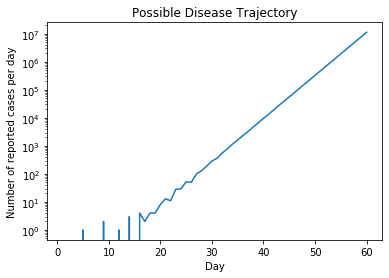

In [135]:
# Test Code to plot one possible disease trajectory. Re-run to see a different trajectory.
import pandas as pd
import matplotlib.pyplot as plt
m=60
s=pd.Series(simulateNewCases(m),index=range(1,m+1))
s.plot(logy=True,title='Possible Disease Trajectory')
plt.xlabel('Day')
plt.ylabel('Number of reported cases per day')
plt.show()

The following set of testing code uses your function to forecast the total number of reported cases within 60 days.

Number of total reported cases in 60 days.
  Forecast mean: 313508870
  Forecast standard deviation: 206691548


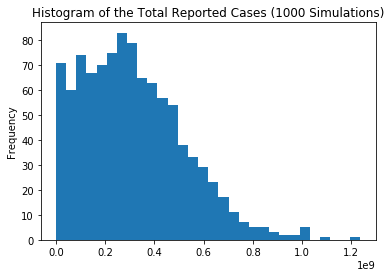

In [136]:
totalReports=pd.Series([sum(simulateNewCases(60)) for i in range(1000)])
print('Number of total reported cases in 60 days.')
print(f'  Forecast mean: {totalReports.mean():.0f}')
print(f'  Forecast standard deviation: {totalReports.std():.0f}')

totalReports.plot(kind='hist',bins=30,\
                 title="Histogram of the Total Reported Cases (1000 Simulations)")
# totalReports